In [34]:
import numpy as np
import seaborn as sns
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
plt.style.use('default') # 使用默认样式
from tools_2D import *
from shape_fns import *
from Elements import *
from Mesh import create_mesh, Boundary
import pickle
from scipy.interpolate import griddata

with open("Data/data.pkl", "rb") as f:
    data_ori = pickle.load(f)
path = 'Data'

# Calculate the Ux and Uy

In [35]:
# Given data
P = 50 * 40  # Total force in N
E = 200e3  # Young's modulus in N/mm^2
nu = 0.3  # Poisson's ratio
h = 1  # Thickness in mm
L = 40  # Length in mm
b = 40  # Breadth in mm

# Computing stresses
sigma_x = P / (h * b)
sigma_y = 0  # No force in y direction

# Computing strains
epsilon_x = (1/E) * (sigma_x - nu * sigma_y)
epsilon_y = (1/E) * (sigma_y - nu * sigma_x)

# Computing displacements
u_x_L_0 = epsilon_x * L
u_y_0_L = epsilon_y * L

u_x_L_0, u_y_0_L


(0.01, -0.003)

In [36]:
with open("Data/data_U_post.pkl", "rb") as f:
    data = pickle.load(f)
data

{'1': {'T3': {'U': 25.897983119015205,
   'U_exa': 23.92475973673814,
   'U_list': [14.448568502968225, 31.990564321456603, 31.25481653262078],
   'DOF': [70, 204, 732],
   'mesh_size': [8, 4, 2]},
  'Q4': {'U': 22.337133161897988,
   'U_exa': 23.92475973673814,
   'U_list': [19.43564490381849, 24.128129365859213, 23.342708238706773],
   'DOF': [90, 234, 734],
   'mesh_size': [8, 4, 2]}},
 '0.5': {'T3': {'U': 17.14471427259616,
   'U_exa': 20.331142273239116,
   'U_list': [13.697891494973476, 21.8700331300117, 23.922855604260892],
   'DOF': [80, 238, 828],
   'mesh_size': [8, 4, 2]},
  'Q4': {'U': 18.376733775366297,
   'U_exa': 20.331142273239116,
   'U_list': [18.68567029499151, 17.994089017143065, 17.88396089597256],
   'DOF': [98, 266, 866],
   'mesh_size': [8, 4, 2]}},
 '0.05': {'T3': {'U': 15.44935312421481,
   'U_exa': 16.81476953896992,
   'U_list': [10.200162394125247, 17.600622044909528, 18.54727493360965],
   'DOF': [80, 262, 912],
   'mesh_size': [8, 4, 2]},
  'Q4': {'U': 1

In [37]:
# Compute error in energy norm
errors = {}
for ab_ratio, elements in data.items():
    errors[ab_ratio] = {}
    for element, values in elements.items():
        U_exact = values['U_exa']
        U_computed = values['U_list']
        errors[ab_ratio][element] = [np.sqrt(abs(U_exact - u)/U_exact)*100 for u in U_computed]


# Plot error as a function of mesh size
errors

{'1': {'T3': [62.935127396267475, 58.0630781024968, 55.35156152892577],
  'Q4': [43.31681984833359, 9.219752351191715, 15.597568913481552]},
 '0.5': {'T3': [57.119226622302456, 27.512054296864246, 42.03102136095595],
  'Q4': [28.44882643494445, 33.90419325008372, 34.69382550116415]},
 '0.05': {'T3': [62.72007487968775, 21.618475330277473, 32.09902478717631],
  'Q4': [43.58941846601797, 37.11675765550069, 30.864951751634894]}}

T3 [62.935127396267475, 58.0630781024968, 55.35156152892577]
[8, 4, 2]
Q4 [43.31681984833359, 9.219752351191715, 15.597568913481552]
[8, 4, 2]
T3 [57.119226622302456, 27.512054296864246, 42.03102136095595]
[8, 4, 2]
Q4 [28.44882643494445, 33.90419325008372, 34.69382550116415]
[8, 4, 2]
T3 [62.72007487968775, 21.618475330277473, 32.09902478717631]
[8, 4, 2]
Q4 [43.58941846601797, 37.11675765550069, 30.864951751634894]
[8, 4, 2]
[43.58941846601797, 37.11675765550069, 30.864951751634894]
T3 [62.935127396267475, 58.0630781024968, 55.35156152892577]
Q4 [43.31681984833359, 9.219752351191715, 15.597568913481552]
T3 [57.119226622302456, 27.512054296864246, 42.03102136095595]
Q4 [28.44882643494445, 33.90419325008372, 34.69382550116415]
T3 [62.72007487968775, 21.618475330277473, 32.09902478717631]
Q4 [43.58941846601797, 37.11675765550069, 30.864951751634894]


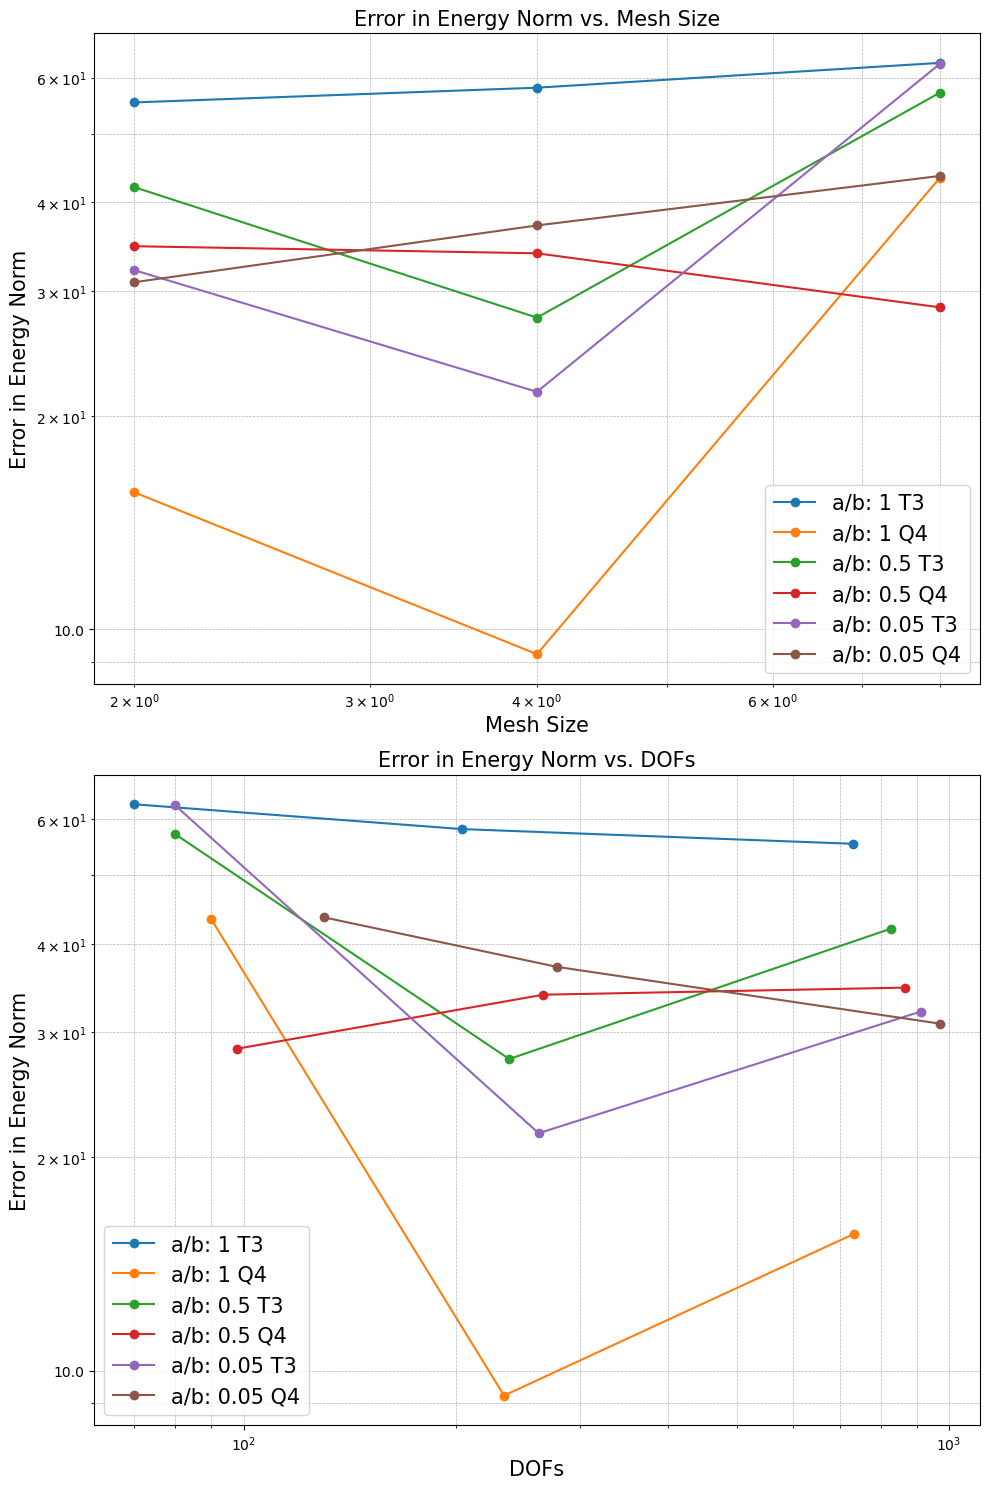

In [38]:
fontsize = 15
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
for ab_ratio, elements in errors.items():
    for element, error in elements.items():
        print(element, error)
        print(data[ab_ratio][element]['mesh_size'])
        axes[0].loglog(data[ab_ratio][element]['mesh_size'], error, '-o', label=f'a/b: {ab_ratio} {element}')
axes[0].set_title('Error in Energy Norm vs. Mesh Size', fontsize=fontsize)
axes[0].set_xlabel('Mesh Size', fontsize=fontsize)
axes[0].set_ylabel('Error in Energy Norm', fontsize=fontsize)

axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)

axes[0].yaxis.set_major_formatter(formatter)

axes[0].legend(fontsize=fontsize)

# Plot error as a function of DOFs
print(error)
for ab_ratio, elements in errors.items():
    for element, error in elements.items():
        print(element, error)
        axes[1].loglog(data[ab_ratio][element]['DOF'], error, '-o', label=f'a/b: {ab_ratio} {element}')
axes[1].set_title('Error in Energy Norm vs. DOFs', fontsize=fontsize)
axes[1].set_xlabel('DOFs', fontsize=fontsize)
axes[1].set_ylabel('Error in Energy Norm', fontsize=fontsize)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].legend(fontsize=fontsize)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
# plt.savefig("images/Q2_4/log_DOFs.png")
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Initialize tables
table_mesh_size = pd.DataFrame(columns=['a/b Ratio', 'Element Type', 'Convergence Rate (Mesh Size)'])
table_dof = pd.DataFrame(columns=['a/b Ratio', 'Element Type', 'Convergence Rate (DOFs)'])
id_1 = 0
id_2 = 2
# Calculate convergence rates
for ab_ratio, elements in errors.items():
    for element, error in elements.items():
        # For Mesh Size
        error1_mesh = error[id_1]
        error2_mesh = error[id_2]
        x1_mesh = data[ab_ratio][element]['mesh_size'][id_1]
        x2_mesh = data[ab_ratio][element]['mesh_size'][id_2]
        print(error1_mesh,error2_mesh , x1_mesh, x2_mesh)
        print(data[ab_ratio][element]['mesh_size']) 
        
        rate_mesh = (np.log(error2_mesh) - np.log(error1_mesh)) / (np.log(x2_mesh) - np.log(x1_mesh))
        print(rate_mesh)
        
        table_mesh_size = table_mesh_size.append({
            'a/b Ratio': ab_ratio,
            'Element Type': element,
            'Convergence Rate (Mesh Size)': rate_mesh
        }, ignore_index=True)
        id_1 = 0
        id_2 = 2
        # For DOFs
        error1_dof = error[id_1]
        error2_dof = error[id_2]
        x1_dof = data[ab_ratio][element]['DOF'][id_1]
        x2_dof = data[ab_ratio][element]['DOF'][id_2]
        rate_dof = (np.log(error2_dof) - np.log(error1_dof)) / (np.log(x2_dof) - np.log(x1_dof))
        
        table_dof = table_dof.append({
            'a/b Ratio': ab_ratio,
            'Element Type': element,
            'Convergence Rate (DOFs)': rate_dof
        }, ignore_index=True)

# Display tables
print("Convergence Rates based on Mesh Size:")
print(table_mesh_size)
print("\nConvergence Rates based on DOFs:")
print(table_dof)


62.935127396267475 55.35156152892577 8 2
[8, 4, 2]
0.09262073404653758
43.31681984833359 15.597568913481552 8 2
[8, 4, 2]
0.7368030731061349
57.119226622302456 42.03102136095595 8 2
[8, 4, 2]
0.22126096558907196
28.44882643494445 34.69382550116415 8 2
[8, 4, 2]
-0.14315489379901214
62.72007487968775 32.09902478717631 8 2
[8, 4, 2]
0.483198907452963
43.58941846601797 30.864951751634894 8 2
[8, 4, 2]
0.2490042102234127
Convergence Rates based on Mesh Size:
  a/b Ratio Element Type  Convergence Rate (Mesh Size)
0         1           T3                      0.092621
1         1           Q4                      0.736803
2       0.5           T3                      0.221261
3       0.5           Q4                     -0.143155
4      0.05           T3                      0.483199
5      0.05           Q4                      0.249004

Convergence Rates based on DOFs:
  a/b Ratio Element Type  Convergence Rate (DOFs)
0         1           T3                -0.054701
1         1           

/var/folders/hd/mc7xhwh55r3c7crzjnccdypr0000gn/T/ipykernel_14372/3534510417.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_mesh_size = table_mesh_size.append({
/var/folders/hd/mc7xhwh55r3c7crzjnccdypr0000gn/T/ipykernel_14372/3534510417.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_dof = table_dof.append({
/var/folders/hd/mc7xhwh55r3c7crzjnccdypr0000gn/T/ipykernel_14372/3534510417.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_mesh_size = table_mesh_size.append({
/var/folders/hd/mc7xhwh55r3c7crzjnccdypr0000gn/T/ipykernel_14372/3534510417.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_dof =

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter

# # # 示例数据（根据您提供的数据结构进行了调整）
# # errors = {
# #     '1': {'T3': [0.1, 0.01, 0.001], 'Q4': [0.1, 0.02, 0.003]},
# #     '0.5': {'T3': [0.15, 0.012, 0.002], 'Q4': [0.13, 0.025, 0.004]}
# # }

# # data = {
# #     '1': {'T3': {'mesh_size': [8, 4, 2], 'DOF': [10, 20, 40]},
# #           'Q4': {'mesh_size': [8, 4, 2], 'DOF': [10, 20, 40]}},
# #     '0.5': {'T3': {'mesh_size': [8, 4, 2], 'DOF': [10, 20, 40]},
# #             'Q4': {'mesh_size': [8, 4, 2], 'DOF': [10, 20, 40]}}
# # }

# # Plotting
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
# formatter = ScalarFormatter(useMathText=False)
# formatter.set_scientific(False)

# for ab_ratio, elements in errors.items():
#     for element, error in elements.items():
#         axes[0].loglog(data[ab_ratio][element]['mesh_size'], error, '-o', label=f'a/b: {ab_ratio} {element}')
# axes[0].set_title('Error in Energy Norm vs. Mesh Size')
# axes[0].set_xlabel('Mesh Size')
# axes[0].set_ylabel('Error in Energy Norm')
# axes[0].legend()
# axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
# axes[0].yaxis.set_major_formatter(formatter)

# # Plot error as a function of DOFs
# for ab_ratio, elements in errors.items():
#     for element, error in elements.items():
#         axes[1].loglog(data[ab_ratio][element]['DOF'], error, '-o', label=f'a/b: {ab_ratio} {element}')
# axes[1].set_title('Error in Energy Norm vs. DOFs')
# axes[1].set_xlabel('DOFs')
# axes[1].set_ylabel('Error in Energy Norm')
# axes[1].legend()
# axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
# axes[1].yaxis.set_major_formatter(formatter)

# plt.tight_layout()
# plt.savefig("images/Q2_4/log_DOFs.png")
# plt.show()


In [41]:
# Compute the rate of convergence
convergence_rates_mesh = {}
convergence_rates_dof = {}

for ab_ratio, elements in errors.items():
    convergence_rates_mesh[ab_ratio] = {}
    convergence_rates_dof[ab_ratio] = {}
    for element, error in elements.items():
        # Using numpy's polyfit to get the slope which represents the rate
        # polyfit returns [slope, intercept] for a degree-1 polynomial
        slope_mesh = np.polyfit(np.log(data[ab_ratio][element]['mesh_size']), np.log(error), 1)[0]
        slope_dof = np.polyfit(np.log(data[ab_ratio][element]['DOF']), np.log(error), 1)[0]
        
        convergence_rates_mesh[ab_ratio][element] = slope_mesh
        convergence_rates_dof[ab_ratio][element] = slope_dof

convergence_rates_mesh, convergence_rates_dof


({'1': {'T3': 0.09262073404653838, 'Q4': 0.7368030731061346},
  '0.5': {'T3': 0.2212609655890725, 'Q4': -0.14315489379901128},
  '0.05': {'T3': 0.4831989074529628, 'Q4': 0.24900421022341296}},
 {'1': {'T3': -0.054147362834438675, 'Q4': -0.45603633398251},
  '0.5': {'T3': -0.1200465660072123, 'Q4': 0.08892705466141226},
  '0.05': {'T3': -0.2701829224195323, 'Q4': -0.16936562180895234}})

In [42]:
for i in range(0):
    print(i)

# Q5

In [43]:

def draw_exact(elements_list, dir ='x'):
    # Initialize global_min and global_max
    global_min = float('inf')
    global_max = float('-inf')

    a_b =elements_list[0].a_b
    # Loop over each element in the elements_list
    for test_element in elements_list:
        
        # Evaluate the exact_fn at each mapping point of the test_element
        values = []
        test_inputs = test_element.sample_points(refine)
        for xy in test_element.mapping(test_inputs):
            value = output(exact_fn(xy[0], xy[1], a_b), dir)
            values.append(value)
        
        # Find the minimum and maximum value for the current element
        local_min = np.min(values)
        local_max = np.max(values)
        
        # Update global_min and global_max
        if local_min < global_min:
            global_min = local_min
        if local_max > global_max:
            global_max = local_max

    if type == 'stress':
        print('Direction:', dir)
        print('Maximum stress value:', global_max)
        print('SCF in model:', global_max/50)
        print('SCF in theory:', 1+2*1/a_b)

    for i in range(len(elements_list)):
        test_element = elements_list[i]
        test_inputs = test_element.sample_points(refine)
        test_mapping = test_element.mapping(test_inputs)
        test_output = [output(exact_fn(xy[0], xy[1], a_b), dir, type) for xy in test_mapping]
        test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)
        # plt.scatter(test_mapping[:, 0], test_mapping[:, 1], s=1, c=test_output)
        plt.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                            test_mapping[:, 0].max(),
                                            test_mapping[:, 1].min(),
                                            test_mapping[:, 1].max()),
                                            origin='lower', aspect='auto',
                                            interpolation='bilinear',cmap='jet',
                                            vmin=global_min, vmax=global_max)
        # 绘制元素的边界
        vertices = test_element.vertices
        vertices = np.vstack([vertices, vertices[0]])  # 将第一个顶点再次添加到数组的末尾，以便封闭形状
        vertices_x, vertices_y = zip(*vertices)  # 解压顶点坐标
        plt.plot(vertices_x, vertices_y,  color='white', linewidth=0.7)  # 使用黑色线绘制边界，并使用小圆点表示顶点s
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    # Display the color bar
    plt.colorbar()
    dir_str = "{ %s }" % dir
    plt.title(rf"Exact solution: $\sigma_{dir_str} \; Mpa$")
    plt.show()

In [44]:

def draw_exact(elements_list, dir ='x', type = 'stress'):
    # Initialize global_min and global_max
    global_min = float('inf')
    global_max = float('-inf')
    E = 200e3
    nu = 0.3
    D = E / (1 - nu**2)* np.array([
        [1, nu, 0],
        [nu, 1, 0],
        [0, 0, (1-nu)/2]
        ])
    a_b =elements_list[0].a_b
    # Loop over each element in the elements_list
    for test_element in elements_list:
        
        # Evaluate the exact_fn at each mapping point of the test_element
        exact_values =[]
        values = []
        test_inputs = test_element.sample_points(refine)

        for xy in test_element.mapping(test_inputs):
            stress_vector = exact_fn(xy[0], xy[1], a_b)
            exact_values.append(stress_vector)
            if type == "strain":
                strain_vector = np.linalg.inv(D) @ stress_vector.T
                value = output(strain_vector, dir)
            elif type == "stress":
                value = output(stress_vector, dir)
            values.append(value)
        
        # Find the minimum and maximum value for the current element
        local_min = np.min(values)
        local_max = np.max(values)
        
        # Update global_min and global_max
        if local_min < global_min:
            global_min = local_min
        if local_max > global_max:
            global_max = local_max

    if type == 'stress':
        print('Direction:', dir)
        print('Maximum stress value:', global_max)
        print('SCF in model:', global_max/50)
        print('SCF in theory:', 1+2*1/a_b)

    for i in range(len(elements_list)):
        test_element = elements_list[i]
        test_inputs = test_element.sample_points(refine)
        test_mapping = test_element.mapping(test_inputs)
        test_output = [output(exact_fn(xy[0], xy[1], a_b), dir, type) for xy in test_mapping]
        test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)
        # plt.scatter(test_mapping[:, 0], test_mapping[:, 1], s=1, c=test_output)
        plt.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                            test_mapping[:, 0].max(),
                                            test_mapping[:, 1].min(),
                                            test_mapping[:, 1].max()),
                                            origin='lower', aspect='auto',
                                            interpolation='bilinear',cmap='jet',
                                            vmin=global_min, vmax=global_max)
        # 绘制元素的边界
        vertices = test_element.vertices
        vertices = np.vstack([vertices, vertices[0]])  # 将第一个顶点再次添加到数组的末尾，以便封闭形状
        vertices_x, vertices_y = zip(*vertices)  # 解压顶点坐标
        plt.plot(vertices_x, vertices_y,  color='white', linewidth=0.7)  # 使用黑色线绘制边界，并使用小圆点表示顶点s
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    # Display the color bar
    plt.colorbar()
    dir_str = "{ %s }" % dir
    plt.title(rf"Exact solution: $\sigma_{dir_str} \; Mpa$")
    plt.show()

In [45]:
def draw_Q5(elements_list, dir='xy', type='disp', show = False):
    
    fig = plt.figure(figsize=(6, 7))
    
    # 使用 gridspec 定义子图的布局
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])  # 第一个数字是 ax1 的高度，第二个数字是 ax2 的高度
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax2.set_aspect('equal')

    # 获取 ax1 的当前位置
    pos1 = ax1.get_position()

    # 调整 ax1 的宽度和位置
    reduced_width = 0.62  # 减小 ax1 的宽度到 0.5
    ax1.set_position([0.124, pos1.y0, reduced_width, pos1.height])
    ax2.set_position([0.1, 0.1, 0.75, 0.5])  # slight adjustment to avoid overlap

    # # 在子图上绘制一些示例数据
    # ax1.plot([0, 1, 2], [0, 1, 0])
    # ax2.plot([0, 1, 2], [0, 1, 2])


    global_min = min([np.min([output(test_element(xy[0], xy[1], type), dir, type) for xy in test_element.sample_points(refine)]) for test_element in elements_list])
    global_max = max([np.max([output(test_element(xy[0], xy[1], type), dir, type) for xy in test_element.sample_points(refine)]) for test_element in elements_list])
    max_values_coords = []
    min_values_coords = []

    a_b =elements_list[0].a_b
    # 获取每个元素的最大值/最小值和对应的坐标
    for test_element in elements_list:
        outputs = [output(test_element(xy[0], xy[1], type), dir, type) for xy in test_element.sample_points(refine)]
        
        # 对于最大值
        max_value_element = max(outputs)
        max_coord_element = test_element.mapping(test_element.sample_points(refine))[np.argmax(outputs)]
        max_values_coords.append((max_value_element, max_coord_element))
        
        # 对于最小值
        min_value_element = min(outputs)
        min_coord_element = test_element.mapping(test_element.sample_points(refine))[np.argmin(outputs)]
        min_values_coords.append((min_value_element, min_coord_element))

    # 计算 global_max 和 global_min 以及获取对应的坐标
    global_max, global_max_coord = max(max_values_coords, key=lambda x: x[0])
    global_min, global_min_coord = min(min_values_coords, key=lambda x: x[0])
    if type == 'stress':
        print('Direction:', dir)
        print('Maximum stress value:', global_max[0])
        print('SCF in model:', global_max[0]/50)
        print('SCF in theory:', 1+2*1/a_b) 

    free_edge = []

    for test_element in elements_list:
        count = 0
        for node in test_element.nodes:
            if abs(node.xy[1]-40) <1e-3:
                count += 1
        if count>1:
            free_edge.append(test_element)
                
        test_inputs = test_element.sample_points(refine)
        test_mapping = test_element.mapping(test_inputs)
        test_output = [output(test_element(xy[0], xy[1], type), dir, type)
                        for xy in test_inputs]
        test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)

        ax2.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                    test_mapping[:, 0].max(),
                                    test_mapping[:, 1].min(),
                                    test_mapping[:, 1].max()),
                    origin='lower', aspect='auto',
                    interpolation='none', cmap='jet',
                    vmin=global_min, vmax=global_max)
       
        # 绘制元素的边界
        vertices = test_element.vertices
        vertices = np.vstack([vertices, vertices[0]])
        vertices_x, vertices_y = zip(*vertices)
        ax2.plot(vertices_x, vertices_y,  color='white', linewidth=0.7)

    ax2.set_xlim(0, 40)
    ax2.set_ylim(0, 40)
    fig.colorbar(ax2.get_images()[0], ax=ax2, orientation='vertical')
    ax2.scatter(global_max_coord[0], global_max_coord[1],s=50, color='blue')
    ax2.text(global_max_coord[0], global_max_coord[1]-4, f"{global_max[0]:.2f}", color='white', fontsize=20, verticalalignment='bottom',
         bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle="round,pad=0.3"))

    if type == 'disp':
        type_str = 'U'
        unit = 'mm'
    elif type == 'strain':
        type_str = '\\epsilon'
        unit = ''
    elif type == 'stress':
        type_str = '\\sigma'
        unit = 'Mpa'
    dir_str = "{ %s }" % dir
    ax2.set_title(rf"${type_str}_{dir_str}\; {unit}$", fontsize=15)
    
    # Plot for free edge
    print('number of elements at free edge:', len(free_edge))
    # Dictionary to store the accumulated stress and count for each node
    node_stress_accumulator = {}
    
    for elem in free_edge:
        points, Ws = Gauss_points(elem, 2)
        for i in range(len(elem.nodes)):
            node = elem.nodes[i]
            if abs(node.xy[1] - 40) < 1e-3:
                node_value = 0
                for j in range(len(points)):
                    point = points[j]
                    stress = output(elem(point[0], point[1], type), dir, type)
                    node_value += elem.phis[j](point[0], point[1]) * stress
                
                # Add the extrapolated value to the accumulator
                if node.xy[0] in node_stress_accumulator:
                    node_stress_accumulator[node.xy[0]][0] += node_value
                    node_stress_accumulator[node.xy[0]][1] += 1
                else:
                    node_stress_accumulator[node.xy[0]] = [node_value, 1]

    # Sort nodes based on x-coordinates
    sorted_nodes = sorted(node_stress_accumulator.keys())

    # Compute the average stress for each node and store in x_data and y_data
    x_data = []
    y_data = []
    for x_coord in sorted_nodes:
        total_stress, count = node_stress_accumulator[x_coord]
        x_data.append(x_coord)
        y_data.append(total_stress / count)
    ax1.scatter(x_data,y_data, )
    ax1.set_title(rf"${type_str}_{dir_str}$ at the Free Edge", fontsize=15)
    annotation_text = f"Stress Concentration Factor: {global_max[0]:.2f}"
    # ax2.annotate(annotation_text, 
    #             xy=(global_max_coord[0], global_max_coord[1]), 
    #             xytext=(global_max_coord[0], global_max_coord[1]-8),  # 我稍微移动了文本位置，你可以根据需要调整
    #             arrowprops=dict(facecolor='blue', arrowstyle='->', shrinkA=0),
    #             fontsize=20,
    #             ha="center",
    #             color='white',
    #             bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle="round,pad=0.3"))
 
    # plt.tight_layout()
    plt.title("Stress Concentration Factor: {}".format(round(global_max[0]/50, 1)), fontsize=15)
    # plt.savefig('images/Q2_5/Q5_{}_{}_{}.png'.format(a_b, dir, test_element.shape))
    if show: 
        plt.show()

# Run the function with sample data
# draw(elements_list, dir='xy', type='disp')  # Uncomment this line to run the function with your actual data


In [46]:
dirs = ['x', 'y', 'xy', 'von']
indexs = len(data_ori)

mesh_size should be 2, not 8
mesh_size should be 2, not 8
mesh_size should be 2, not 4
mesh_size should be 2, not 4
a_b 1
mesh_size 2
mesh_shape T3
Direction: x
Maximum stress value: 363.1934335910402
SCF in model: 7.263868671820805
SCF in theory: 3.0
number of elements at free edge: 20


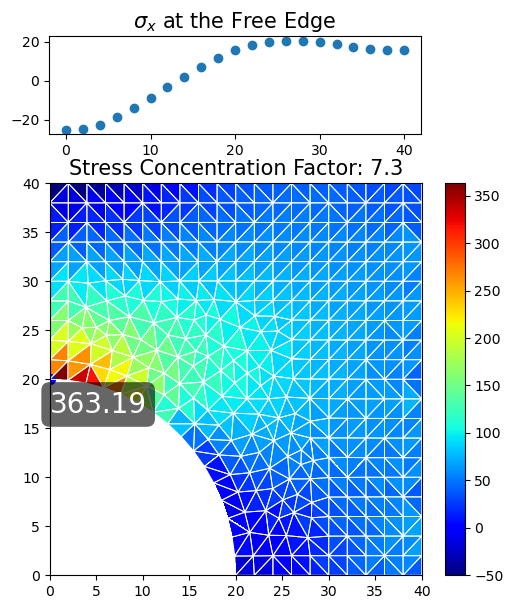

Direction: x
Maximum stress value: 150.0
SCF in model: 3.0
SCF in theory: 3.0


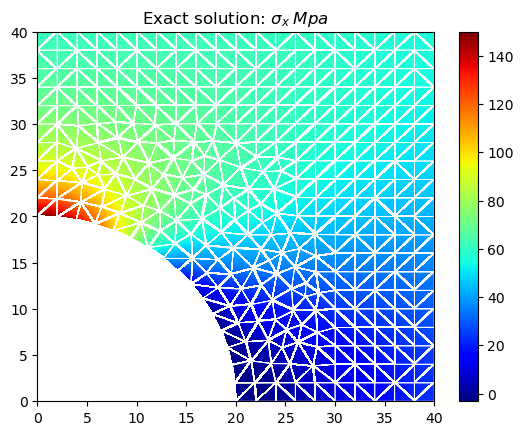

a_b 1
mesh_size 2
mesh_shape Q4
Direction: x
Maximum stress value: 320.7361221039971
SCF in model: 6.414722442079942
SCF in theory: 3.0
number of elements at free edge: 20


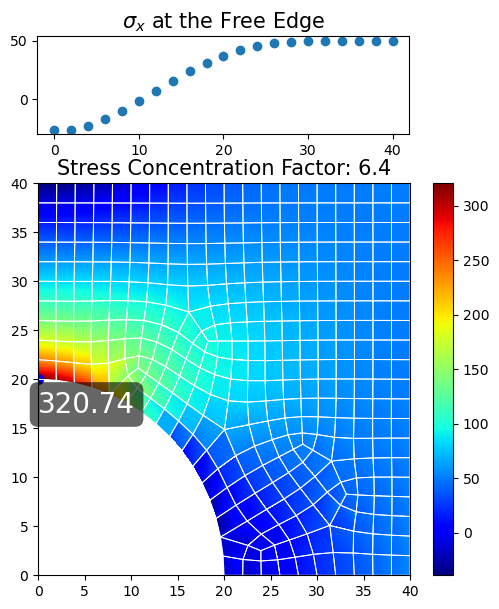

Direction: x
Maximum stress value: 150.0
SCF in model: 3.0
SCF in theory: 3.0


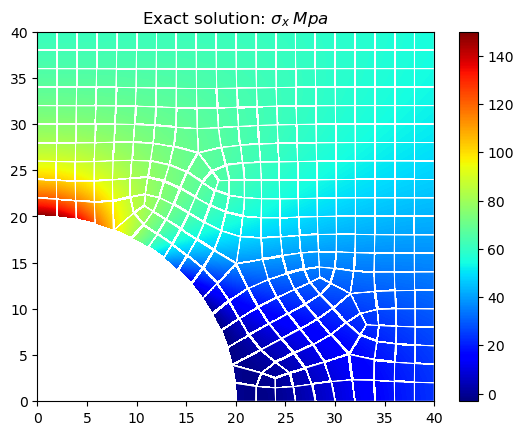

mesh_size should be 2, not 8
mesh_size should be 2, not 8
mesh_size should be 2, not 4
mesh_size should be 2, not 4
a_b 0.5
mesh_size 2
mesh_shape T3
Direction: x
Maximum stress value: 417.9550566111815
SCF in model: 8.35910113222363
SCF in theory: 5.0
number of elements at free edge: 20


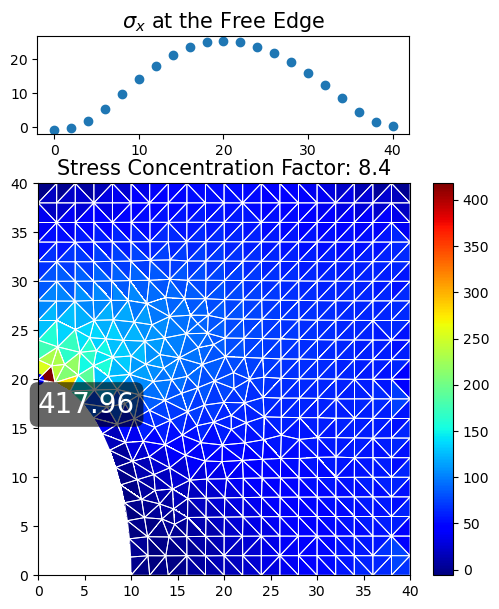

Direction: x
Maximum stress value: 250.0
SCF in model: 5.0
SCF in theory: 5.0


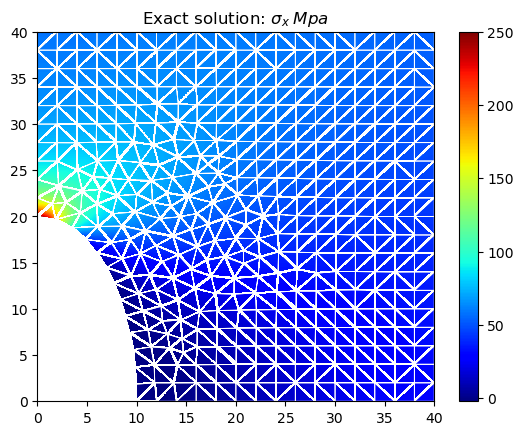

a_b 0.5
mesh_size 2
mesh_shape Q4
Direction: x
Maximum stress value: 389.2521293034464
SCF in model: 7.785042586068928
SCF in theory: 5.0
number of elements at free edge: 20


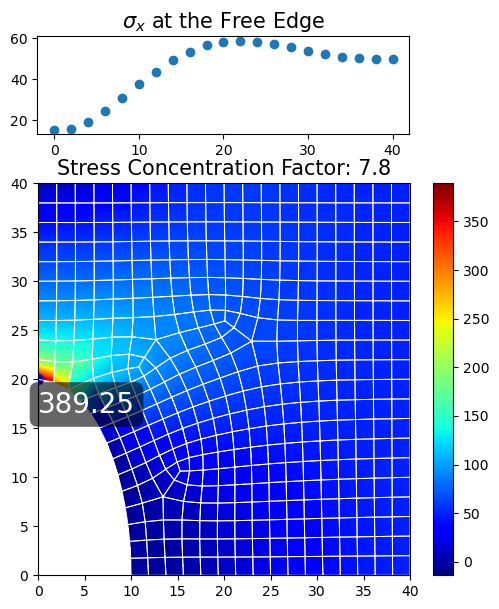

Direction: x
Maximum stress value: 250.0
SCF in model: 5.0
SCF in theory: 5.0


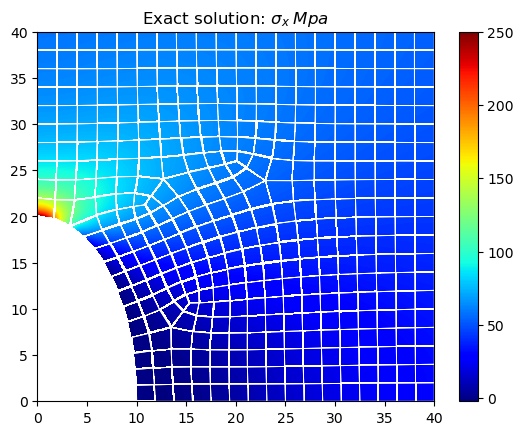

mesh_size should be 2, not 8
mesh_size should be 2, not 8
mesh_size should be 2, not 4
mesh_size should be 2, not 4
a_b 0.05
mesh_size 2
mesh_shape T3
Direction: x
Maximum stress value: 287.7615314815951
SCF in model: 5.755230629631902
SCF in theory: 41.0
number of elements at free edge: 20


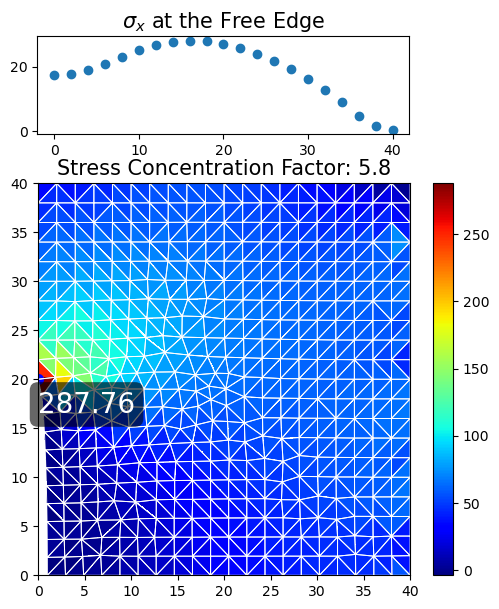

Direction: x
Maximum stress value: 2050.0
SCF in model: 41.0
SCF in theory: 41.0


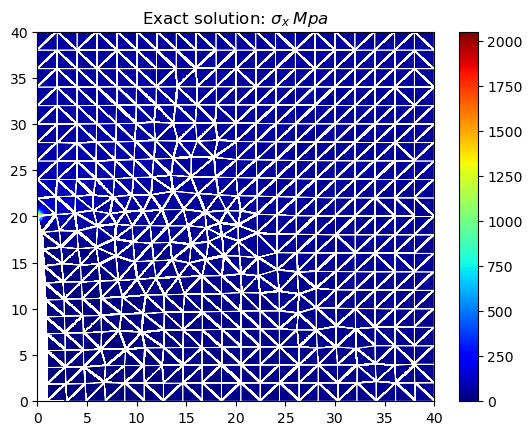

a_b 0.05
mesh_size 2
mesh_shape Q4
Direction: x
Maximum stress value: 347.87829921661717
SCF in model: 6.957565984332343
SCF in theory: 41.0
number of elements at free edge: 20


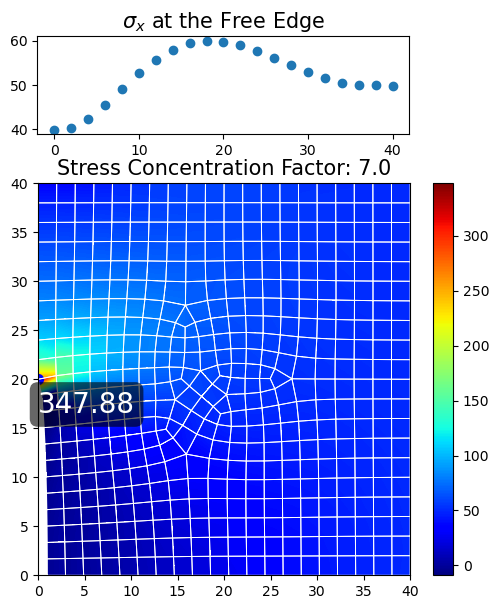

Direction: x
Maximum stress value: 2050.0
SCF in model: 41.0
SCF in theory: 41.0


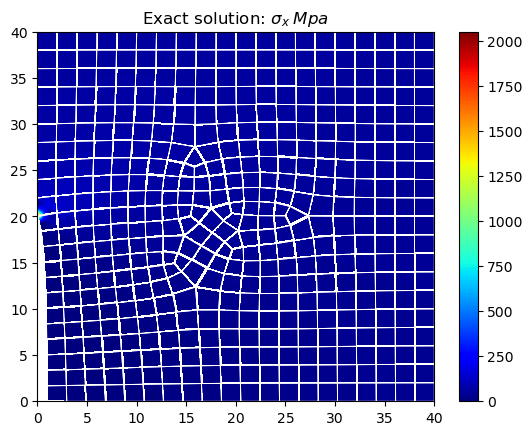

In [50]:
dir ='xy'
type = 'stress'
if type == 'disp':
    type_str = 'U'
elif type == 'strain':
    type_str = '\\epsilon'
elif type == 'stress':
    type_str = '\\sigma'
dir_str = "{ %s }" % dir
iii = -1
show = True
refine = 3

for iii in range(indexs):
    for dir in dirs:
        if dir in ['x']:
            elements_list = data_ori[iii]['elements_list']
            mesh_size = data_ori[iii]['mesh_size']
            mesh_shape = data_ori[iii]['mesh_shape']
            if mesh_size != 2:
                print("mesh_size should be 2, not {}".format(mesh_size))
                pass
                # raise ValueError ("mesh_size should be 2")
            else:
                a_b =data_ori[iii]['a_b'] 
                data_keys = list(data_ori[iii].keys())[:3]
                for key in data_keys:
                    print(key, data_ori[iii][key])

                # draw(elements_list, dir, type)
                # draw(elements_list, 'y', type)
                draw_Q5(elements_list, dir, type, show)
                draw_exact(elements_list, dir)
    else:
        pass


Direction: x
Maximum stress value: 2050.0
SCF in model: 41.0
SCF in theory: 41.0


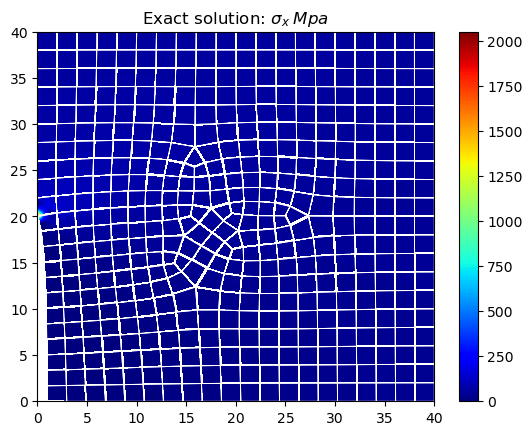

In [48]:
draw_exact(elements_list,'x')
